# Instrucciones del proyecto
1. Prepara los datos

1.1. Abre los archivos y examina los datos.

Ruta de acceso a los archivos:

/datasets/gold_recovery_train.csv
/datasets/gold_recovery_test.csv
/datasets/gold_recovery_full.csv

1.2. Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

1.3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

1.4. Realiza el preprocesamiento de datos.

2. Analiza los datos

2.1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

2.2. Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

2.3. Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

3. Construye el modelo

3.1. Escribe una función para calcular el valor final de sMAPE.

3.2. Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

Utiliza estas fórmulas para las métricas de evaluación:

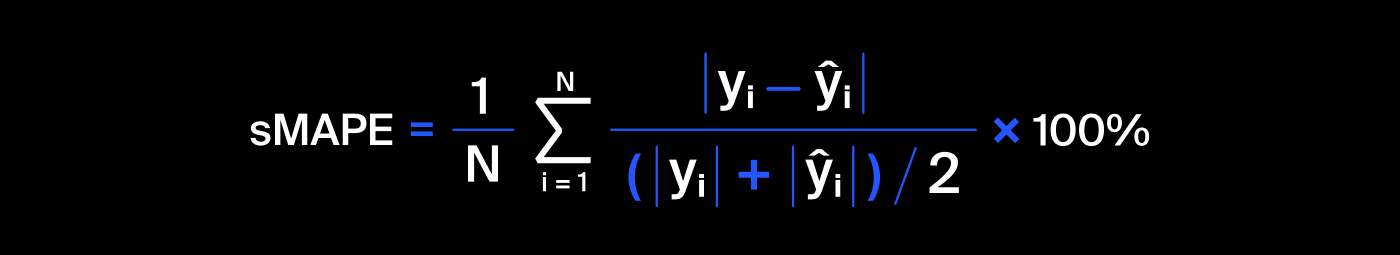

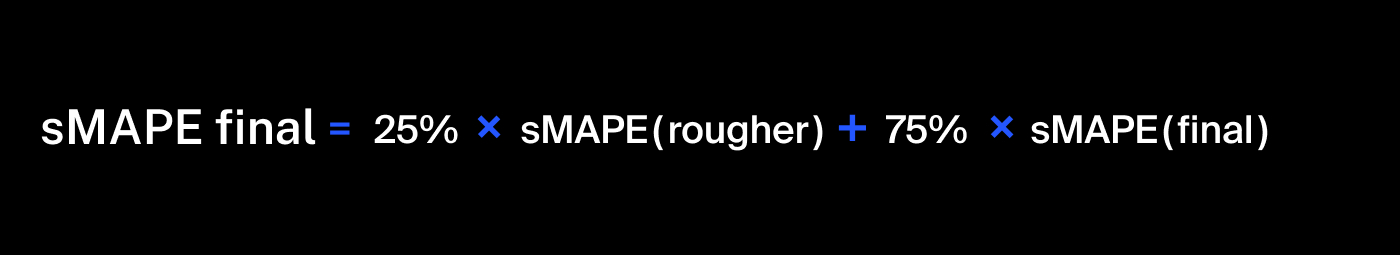

Evaluación del proyecto
Hemos definido los criterios de evaluación para el proyecto. Léelos con atención antes de pasar al ejercicio.

Esto es lo que los revisores buscarán cuando evalúen tu proyecto:

* ¿Has preparado y analizado los datos adecuadamente?
* ¿Qué modelos has desarrollado?
* ¿Cómo has comprobado la calidad del modelo?
* ¿Has seguido todos los pasos de las instrucciones?
* ¿Has respetado la estructura del proyecto y explicado los pasos realizados?
* ¿Cuáles son tus hallazgos?
* ¿Has mantenido el código limpio y has evitado su duplicación?

Ya tienes las hojas informativas y los resúmenes de los capítulos anteriores, así que ya puedes empezar.

¡Buena suerte!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

# Preparar los datos

## Abrir los archivos y examinar los datos

In [2]:
url_1 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_full.csv"
url_2 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_test.csv"
url_3 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_train.csv"

In [3]:
def explorar_dataset(df):
    """
    Explora un DataFrame mostrando información clave.

    Esta función imprime: información general del DataFrame (df.info()),
    sus dimensiones (df.shape), las primeras 15 filas (df.head(15)),
    estadísticas descriptivas (df.describe()), el conteo de valores nulos
    (df.isnull().sum()) y el conteo de filas duplicadas (df.duplicated().sum()).

    Parámetros:
        df (pd.DataFrame): El DataFrame a explorar.
    """

    print('---' * 10, '\n', f'Información del dataframe')
    print(df.info())
    print('---' * 10, '\n', f'Dimensiones del dataframe')
    print(df.shape)
    print('---' * 10, '\n', f'Valores nulos del dataframe')
    print(df.isnull().sum() / len(df) * 100)
    print('---' * 10, '\n', f'Valores duplicados del dataframe')
    print(df.duplicated().sum())
    print('---' * 10)

In [4]:
gold_recovery_full = pd.read_csv(url_1)
gold_recovery_test = pd.read_csv(url_2)
gold_recovery_train = pd.read_csv(url_3)

In [5]:
explorar_dataset(gold_recovery_full)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail

In [6]:
explorar_dataset(gold_recovery_test)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floa

In [7]:
explorar_dataset(gold_recovery_train)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail

## Rougher.output.recovery calculo y EAM

In [8]:
def recovery(C, F, T):
    """
    Calcula el porcentaje de recuperación metalúrgica.

    Esta función aplica la fórmula de recuperación:
        recovery = (C * (F - T)) / (F * (C - T)) * 100

    Posteriormente, se reemplazan por valores nulos (NaN) aquellos
    resultados que sean menores a 0 o mayores a 100, ya que se
    consideran físicamente no válidos.

    Parámetros:
        C (array-like o pd.Series): Concentración del concentrado.
        F (array-like o pd.Series): Concentración de la alimentación.
        T (array-like o pd.Series): Concentración de la cola.

    Retorna:
        recovery (array-like o pd.Series): Porcentaje de recuperación válido.
    """

    recovery = (C * (F - T)) / (F * (C - T)) * 100

    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan

    return recovery


![image](https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.2.3ES.png)

Donde:

-   **C:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en el concentrado justo después de la flotación o
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro después de la purificación.
-   **F:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en la alimentación antes de la flotación
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro en el concentrado justo después de la flotación.
-   **T:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en las colas rougher justo después de la flotación.
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro después de la purificación.

In [9]:
C_ror = gold_recovery_full['rougher.output.concentrate_au']
F_ror = gold_recovery_full['rougher.input.feed_au']
T_ror = gold_recovery_full['rougher.output.tail_au']

In [10]:
df_aem = pd.DataFrame()
df_aem['rougher.output.recovery.calculated'] = recovery(C_ror, F_ror, T_ror)

In [11]:
df_aem['rougher.output.recovery'] = gold_recovery_full['rougher.output.recovery']

In [12]:
from sklearn.metrics import mean_absolute_error

In [13]:
df_aem.fillna(0, inplace=True)

In [14]:
mae = mean_absolute_error(df_aem['rougher.output.recovery'], df_aem['rougher.output.recovery.calculated'])
print(f"El error absoluto medio (MAE) es: {mae}")

El error absoluto medio (MAE) es: 8.497257797509997e-15


## Analizar las caracteristicas no disponibles en el conjunto de prueba

In [15]:
columns_test = gold_recovery_test.columns
columns_train = gold_recovery_train.columns

In [16]:
columns_full = gold_recovery_full.drop(columns=columns_test)

In [17]:
columns_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                                22635 non-null  float64


## Preprocesamiento de datos

In [18]:
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'])
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'])
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'])

In [19]:
from scipy.stats import normaltest

In [20]:
def fill_nas(df):
    """
    Rellena los valores nulos de un DataFrame según la distribución de los datos.

    Esta función identifica las columnas de tipo float64 y evalúa si sus valores
    siguen una distribución normal utilizando la prueba de normalidad de D’Agostino.
    Si la distribución es normal (p > 0.05), los valores nulos se reemplazan por
    la media; en caso contrario, se reemplazan por la mediana.

    La imputación se realiza sin modificar el DataFrame original.

    Parámetros:
        df (pd.DataFrame): DataFrame con valores nulos a imputar.

    Retorna:
        df_filled (pd.DataFrame): Nuevo DataFrame con valores nulos imputados.
    """

    df_filled = df.copy()

    columns = [n for n in df_filled.columns if df_filled[n].dtype == "float64"]

    alpha = 0.05

    for column in columns:
        stat, p = normaltest(df_filled[column])

        if p > alpha:
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
        else:
            df_filled[column] = df_filled[column].fillna(df_filled[column].median())

    return df_filled

In [21]:
gold_recovery_full = fill_nas(gold_recovery_full)
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                                22716 non-null  float64       
 7   final.output.tail_pb                                22716 non-null  float64       
 8   final.

In [22]:
gold_recovery_test = fill_nas(gold_recovery_test)
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

In [23]:
gold_recovery_train = fill_nas(gold_recovery_train)
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

# Analiza los datos

In [24]:
elementos = {
    "Oro": "au",
    "Plata": "ag",
    "Plomo": "pb"
}

## Cambios en la concentración de metales

In [25]:
from matplotlib import legend

In [26]:
def graficar_concentraciones(df, elemento):
    """
    Grafica la distribución y el boxplot de las concentraciones de un elemento
    a lo largo de las distintas etapas del proceso.

    Esta función construye dos gráficos:
    - Un histograma con curva KDE para visualizar la distribución de las
      concentraciones del elemento en cada etapa.
    - Un boxplot para comparar la dispersión y presencia de valores atípicos
      entre dichas etapas.

    Las etapas consideradas son:
        - Alimentación (feed)
        - Concentrado del rougher
        - Concentrado del limpiador primario
        - Concentrado final

    Parámetros:
        df (pd.DataFrame): DataFrame que contiene las columnas de concentración.
        elemento (str): Nombre del elemento químico (por ejemplo, 'au', 'ag', 'pb').

    Retorna:
        None. La función muestra los gráficos en pantalla.
    """

    columns = [
        'rougher.input.feed_' + elemento,
        'rougher.output.concentrate_' + elemento,
        'primary_cleaner.output.concentrate_' + elemento,
        'final.output.concentrate_' + elemento
    ]

    fig, axs = plt.subplots(
        1,
        2,
        figsize=(15, 5),
        gridspec_kw={'width_ratios': [2, 1]}
    )

    # Histograma con KDE
    for column in columns:
        sns.histplot(
            data=df,
            x=column,
            kde=True,
            ax=axs[0],
            label=column
        )

    axs[0].set_title(f'Distribución de Concentración de {elemento.capitalize()}')
    axs[0].set_xlabel(f'Concentración de {elemento.capitalize()}')
    axs[0].set_ylabel('Frecuencia')
    axs[0].legend(loc='upper right')

    # Boxplot
    sns.boxplot(
        data=df[columns],
        ax=axs[1],
        flierprops=dict(
            marker='x',
            markersize=0.5,
            markerfacecolor='red',
            markeredgecolor='red'
        )
    )

    axs[1].set_title(f'Boxplot de Concentración de {elemento.capitalize()}')
    axs[1].set_xlabel('')
    axs[1].set_xticklabels([])
    axs[1].set_ylabel(f'Concentración de {elemento.capitalize()}')

    plt.tight_layout()
    plt.show()

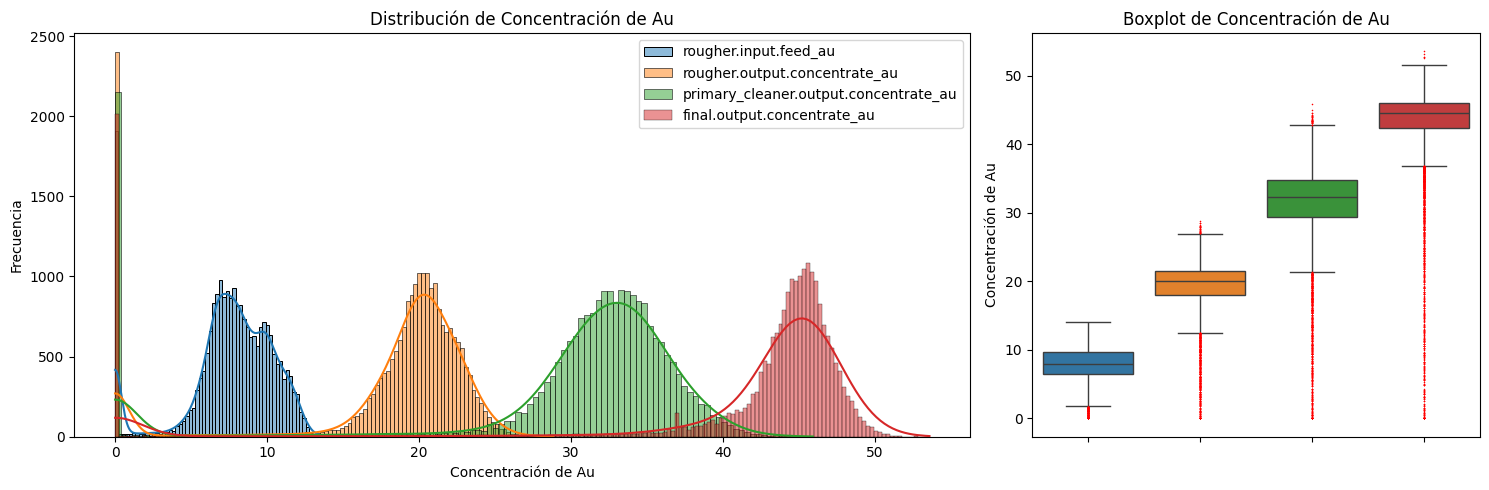

In [27]:
graficar_concentraciones(gold_recovery_full, elementos["Oro"])

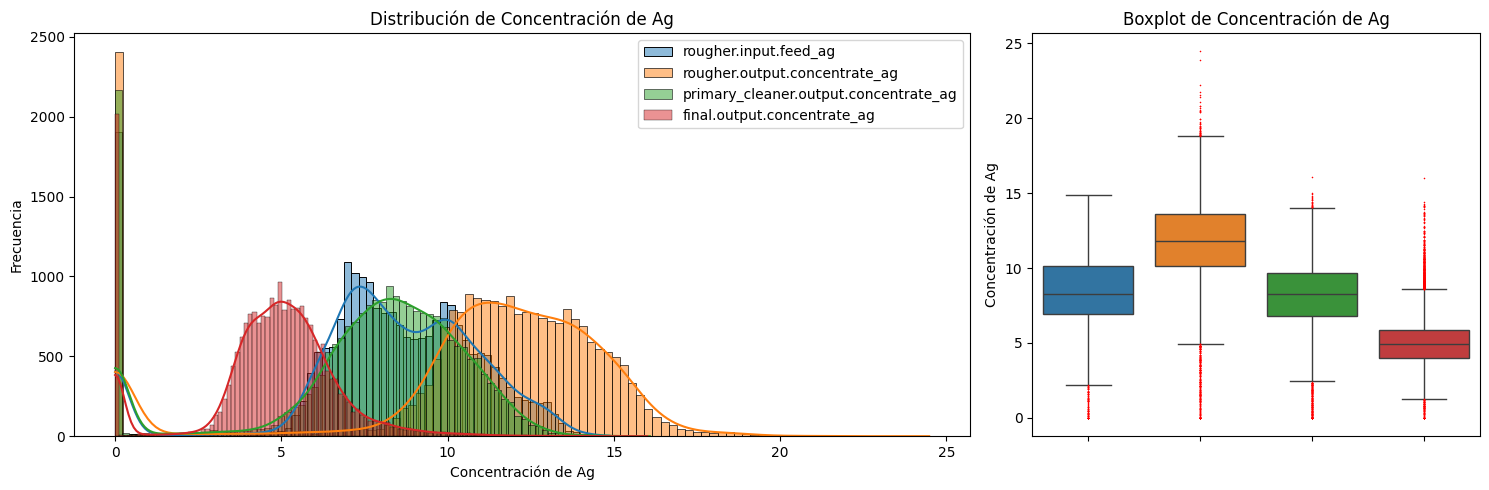

In [28]:
graficar_concentraciones(gold_recovery_full, elementos["Plata"])

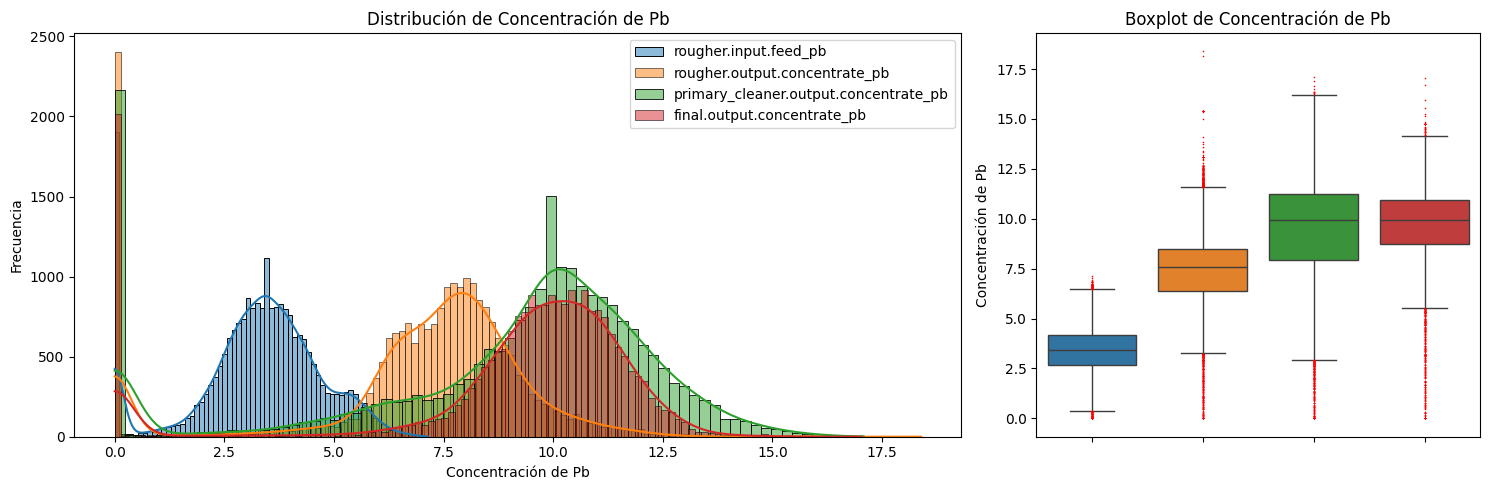

In [29]:
graficar_concentraciones(gold_recovery_full, elementos["Plomo"])

## Comparación en la distribución de tamaños de partículas

In [30]:
def comparacion_particulas(entrenamiento, test):
    """
    Compara la distribución del tamaño de partículas entre los conjuntos
    de entrenamiento y prueba.

    Esta función filtra ambos DataFrames para considerar únicamente valores
    de tamaño de partículas mayores a 1 y luego grafica sus distribuciones
    mediante histogramas con curva KDE superpuesta, permitiendo evaluar
    posibles diferencias entre ambos conjuntos.

    Parámetros:
        entrenamiento (pd.DataFrame): DataFrame del conjunto de entrenamiento.
        test (pd.DataFrame): DataFrame del conjunto de prueba.

    Retorna:
        None. La función muestra el gráfico en pantalla.
    """

    rougher_train = entrenamiento[entrenamiento['rougher.input.feed_size'] > 1]
    rougher_test = test[test['rougher.input.feed_size'] > 1]

    fig, ax = plt.subplots(figsize=(10, 6))

    sns.histplot(
        rougher_train['rougher.input.feed_size'],
        label='Entrenamiento',
        kde=True,
        color='blue',
        alpha=0.5,
        ax=ax
    )

    sns.histplot(
        rougher_test['rougher.input.feed_size'],
        label='Test',
        kde=True,
        color='red',
        alpha=0.5,
        ax=ax
    )

    ax.set_title('Distribución de tamaños de partículas')
    ax.set_xlabel('Tamaño de partículas')
    ax.set_ylabel('Frecuencia')
    ax.legend()

    plt.show()

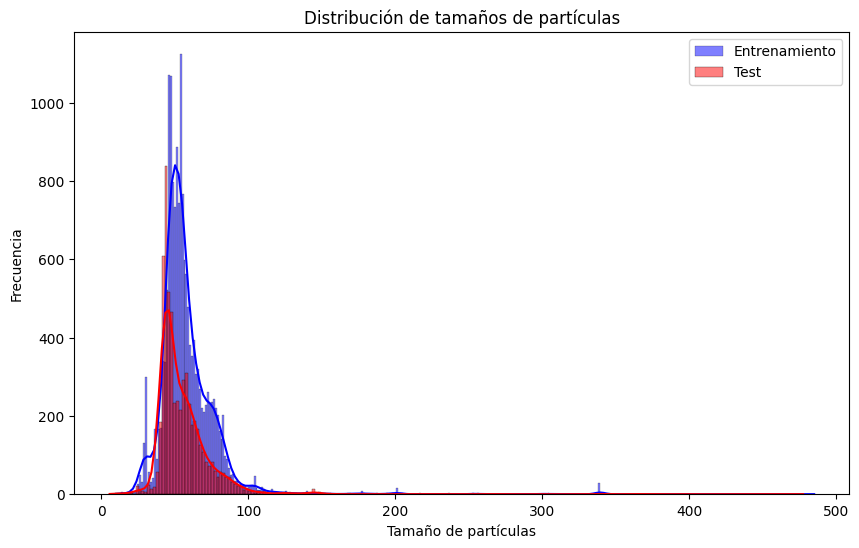

In [31]:
comparacion_particulas(gold_recovery_train, gold_recovery_test)

# Task
Calculate the total concentration of all substances (Au, Ag, Pb, Sol) for the raw material (feed), rougher concentrate, and final concentrate stages in the `gold_recovery_full` DataFrame. New columns named `rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total` will be created. Then, visualize the distributions of these total concentrations using histograms and box plots to identify any abnormal values, especially those near zero. After identifying anomalies, remove rows from the `gold_recovery_full` DataFrame where any of the total concentration values are less than 1.0. Next, filter the `gold_recovery_train` and `gold_recovery_test` DataFrames, keeping only the rows that correspond to the dates present in the cleaned `gold_recovery_full` DataFrame. For the test set, also merge the `rougher.output.recovery` and `final.output.recovery` columns from the cleaned full dataset. Finally, describe the number of rows removed due to anomalies, discuss the impact of these removals, and display the shapes of the updated `gold_recovery_train` and `gold_recovery_test` DataFrames. Summarize the findings from the total concentration analysis, anomaly removal, and the resulting state of the datasets.

## Calculate Total Concentrations for Full Dataset

### Subtask:
Calculate the total concentration of all substances (Au, Ag, Pb, Sol) for the raw material (feed), rougher concentrate, and final concentrate stages in the `gold_recovery_full` DataFrame. New columns named `rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total` will be created.


**Reasoning**:
The user wants to calculate the total concentration for the raw material feed stage. This requires summing the specified columns and storing the result in a new column.



In [32]:
gold_recovery_full['rougher.input.feed_total'] = gold_recovery_full['rougher.input.feed_au'] + gold_recovery_full['rougher.input.feed_ag'] + gold_recovery_full['rougher.input.feed_pb'] + gold_recovery_full['rougher.input.feed_sol']

**Reasoning**:
The user wants to calculate the total concentration for the rougher concentrate stage. This requires summing the specified columns and storing the result in a new column, as per the second instruction of the subtask.



In [33]:
gold_recovery_full['rougher.output.concentrate_total'] = gold_recovery_full['rougher.output.concentrate_au'] + gold_recovery_full['rougher.output.concentrate_ag'] + gold_recovery_full['rougher.output.concentrate_pb'] + gold_recovery_full['rougher.output.concentrate_sol']

**Reasoning**:
The user wants to calculate the total concentration for the final concentrate stage. This requires summing the specified columns and storing the result in a new column, as per the third instruction of the subtask.



In [34]:
gold_recovery_full['final.output.concentrate_total'] = gold_recovery_full['final.output.concentrate_au'] + gold_recovery_full['final.output.concentrate_ag'] + gold_recovery_full['final.output.concentrate_pb'] + gold_recovery_full['final.output.concentrate_sol']

## Visualize Total Concentrations and Identify Anomalies

### Subtask:
Visualize the distributions of the total concentrations (`rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total`) using histograms and box plots to identify any abnormal values, especially those near zero.

**Reasoning**:
To visualize the distributions of the total concentrations and identify anomalies, a function will be defined to generate both a histogram and a box plot for the specified columns. This function will then be called for each of the total concentration columns to be analyzed.



In [35]:
def plot_total_concentrations(df, columns):
    """
    Grafica la distribución y el boxplot de múltiples variables de concentración.

    Esta función genera, para cada columna especificada, dos visualizaciones:
    - Un histograma con curva KDE para analizar la distribución de los datos.
    - Un boxplot para evaluar la dispersión y la presencia de valores atípicos.

    Cada fila del gráfico corresponde a una variable distinta y se divide en
    dos subgráficos: distribución (izquierda) y boxplot (derecha).

    Parámetros:
        df (pd.DataFrame): DataFrame que contiene las variables de concentración.
        columns (list[str]): Lista de nombres de columnas a graficar.

    Retorna:
        None. La función muestra los gráficos en pantalla.
    """

    fig, axs = plt.subplots(
        len(columns),
        2,
        figsize=(15, 5 * len(columns)),
        gridspec_kw={'width_ratios': [2, 1]}
    )

    if len(columns) == 1:
        axs = [axs]

    for i, column in enumerate(columns):
        # Histograma con KDE
        sns.histplot(
            data=df,
            x=column,
            kde=True,
            ax=axs[i][0]
        )

        axs[i][0].set_title(f'Distribución de {column}')
        axs[i][0].set_xlabel(column)
        axs[i][0].set_ylabel('Frecuencia')

        # Boxplot
        sns.boxplot(
            data=df,
            y=column,
            ax=axs[i][1],
            flierprops=dict(
                marker='o',
                markersize=5,
                markerfacecolor='red',
                markeredgecolor='red'
            )
        )

        axs[i][1].set_title(f'Boxplot de {column}')
        axs[i][1].set_ylabel(column)

    plt.tight_layout()
    plt.show()

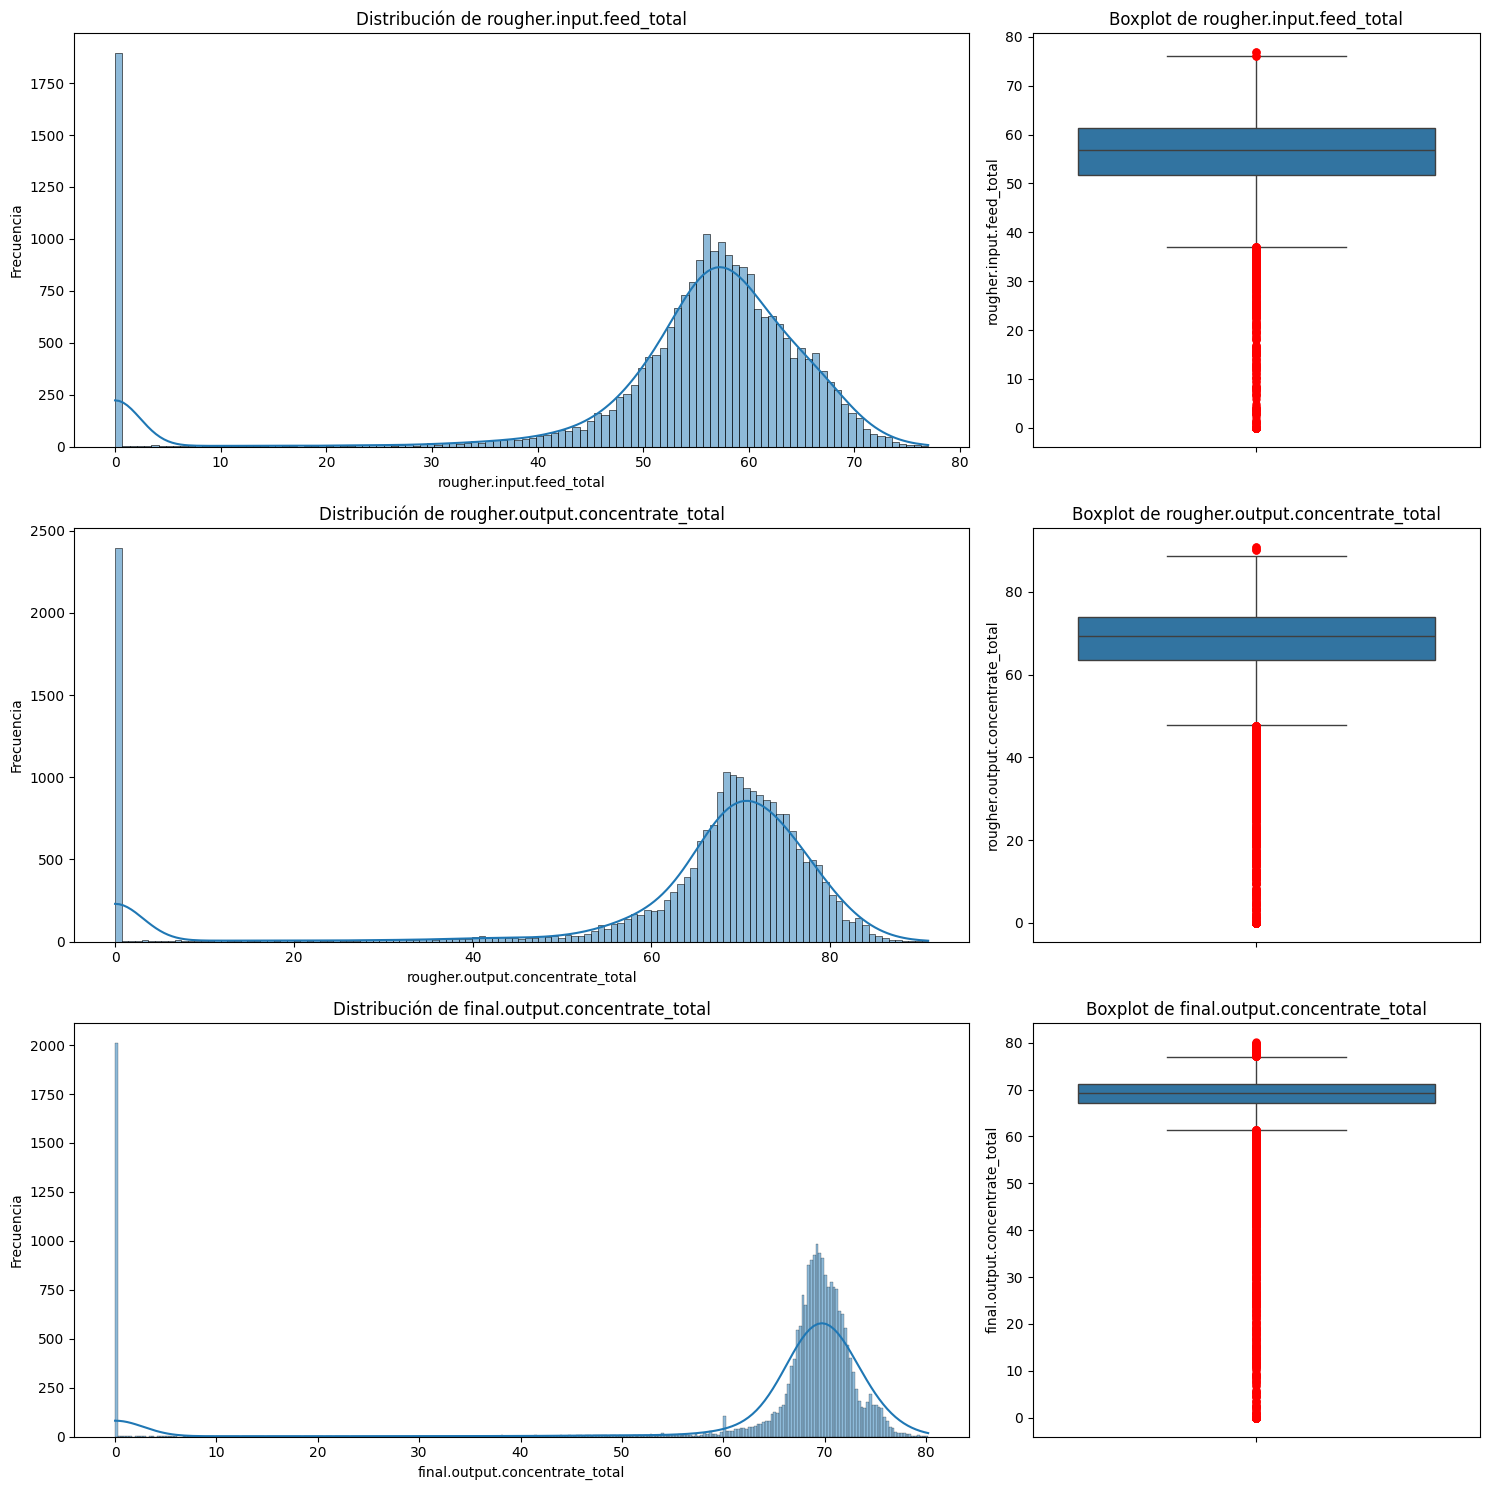

In [36]:
total_concentration_columns = [
    'rougher.input.feed_total',
    'rougher.output.concentrate_total',
    'final.output.concentrate_total'
]

plot_total_concentrations(gold_recovery_full, total_concentration_columns)

## Remove Anomalous Values from `gold_recovery_full`

### Subtask:
After identifying anomalies, remove rows from the `gold_recovery_full` DataFrame where any of the total concentration values (`rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total`) are less than 1.0. Next, filter the `gold_recovery_train` and `gold_recovery_test` DataFrames, keeping only the rows that correspond to the dates present in the cleaned `gold_recovery_full` DataFrame. For the test set, also merge the `rougher.output.recovery` and `final.output.recovery` columns from the cleaned full dataset. Finally, describe the number of rows removed due to anomalies, discuss the impact of these removals, and display the shapes of the updated `gold_recovery_train` and `gold_recovery_test` DataFrames.

**Reasoning**:
First, store the initial number of rows in `gold_recovery_full` to calculate the number of removed rows later. Then, filter `gold_recovery_full` to remove rows where any of the total concentration values are less than 1.0. This directly addresses the first part of the subtask regarding anomaly removal.



In [37]:
initial_rows_full = gold_recovery_full.shape[0]
gold_recovery_full_cleaned = gold_recovery_full[
    (gold_recovery_full['rougher.input.feed_total'] >= 1.0) &
    (gold_recovery_full['rougher.output.concentrate_total'] >= 1.0) &
    (gold_recovery_full['final.output.concentrate_total'] >= 1.0)
].copy()

rows_removed_full = initial_rows_full - gold_recovery_full_cleaned.shape[0]
print(f"Número de filas eliminadas por anomalías en gold_recovery_full: {rows_removed_full}")

Número de filas eliminadas por anomalías en gold_recovery_full: 2760


**Reasoning**:
Now that `gold_recovery_full_cleaned` has been created, the next step is to filter the `gold_recovery_train` DataFrame to include only the rows whose 'date' values are present in the `gold_recovery_full_cleaned` DataFrame. This ensures consistency across datasets after anomaly removal.



In [38]:
gold_recovery_train_cleaned = gold_recovery_train[gold_recovery_train['date'].isin(gold_recovery_full_cleaned['date'])].copy()

**Reasoning**:
Next, the `gold_recovery_test` DataFrame needs to be filtered to include only the rows whose 'date' values are present in the `gold_recovery_full_cleaned` DataFrame, ensuring data consistency for the test set after anomaly removal.



In [39]:
gold_recovery_test_cleaned = gold_recovery_test[gold_recovery_test['date'].isin(gold_recovery_full_cleaned['date'])].copy()

**Reasoning**:
The subtask requires merging the 'rougher.output.recovery' and 'final.output.recovery' columns from the cleaned full dataset into the cleaned test set. This will be done by merging `gold_recovery_test_cleaned` with the relevant columns from `gold_recovery_full_cleaned` using the 'date' column as the key.



In [40]:
gold_recovery_test_cleaned = gold_recovery_test_cleaned.merge(
    gold_recovery_full_cleaned[['date', 'rougher.output.recovery', 'final.output.recovery']],
    on='date',
    how='left'
)

**Reasoning**:
After filtering and merging the datasets, the subtask requires displaying the shapes of the updated `gold_recovery_train_cleaned` and `gold_recovery_test_cleaned` DataFrames. This will confirm the dimensions of the cleaned and prepared data.



In [41]:
print(f"Shape of gold_recovery_train_cleaned: {gold_recovery_train_cleaned.shape}")
print(f"Shape of gold_recovery_test_cleaned: {gold_recovery_test_cleaned.shape}")

Shape of gold_recovery_train_cleaned: (14664, 87)
Shape of gold_recovery_test_cleaned: (5292, 55)


## Summary of Data Preparation and Anomaly Removal

**Total Concentrations Calculation:**
New columns `rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total` were successfully created in the `gold_recovery_full` DataFrame. These columns represent the sum of Au, Ag, Pb, and Sol concentrations at each respective stage of the gold recovery process.

**Anomaly Identification:**
Visualizations (histograms and box plots) for these total concentration columns revealed a significant number of entries with concentrations near zero. These values are highly likely to be anomalous, as it's improbable for the total concentration of metals in a sample to be zero or extremely close to zero in a real-world scenario. Such values can severely distort model training and evaluation.

**Anomaly Removal and Data Filtering:**
- A total of **2760** rows were removed from the original `gold_recovery_full` DataFrame because their `rougher.input.feed_total`, `rougher.output.concentrate_total`, or `final.output.concentrate_total` were less than 1.0.
- The `gold_recovery_train` and `gold_recovery_test` DataFrames were then filtered to include only the dates present in the `gold_recovery_full_cleaned` DataFrame, ensuring consistency and integrity across all datasets.
- The `gold_recovery_test_cleaned` DataFrame was enriched with the `rougher.output.recovery` and `final.output.recovery` columns from the `gold_recovery_full_cleaned` DataFrame, which are necessary for model evaluation.

**Impact of Removals:**
The removal of these anomalous rows is crucial for ensuring the quality of the data used in model training. Data points with near-zero concentrations could represent measurement errors, equipment malfunctions, or other non-representative situations. By removing them, we aim to build a more robust and accurate model that better reflects actual gold recovery operations. This cleaning step helps prevent the model from learning from noise or incorrect data, leading to more reliable predictions.

**Updated DataFrame Shapes:**
- `gold_recovery_train_cleaned` now has a shape of (14664, 87).
- `gold_recovery_test_cleaned` now has a shape of (5292, 55).

## Summary of Data Preparation and Anomaly Removal

**Total Concentrations Calculation:**
New columns `rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total` were successfully created in the `gold_recovery_full` DataFrame. These columns represent the sum of Au, Ag, Pb, and Sol concentrations at each respective stage of the gold recovery process.

**Anomaly Identification:**
Visualizations (histograms and box plots) for these total concentration columns revealed a significant number of entries with concentrations near zero. These values are highly likely to be anomalous, as it's improbable for the total concentration of metals in a sample to be zero or extremely close to zero in a real-world scenario. Such values can severely distort model training and evaluation.

**Anomaly Removal and Data Filtering:**
- A total of **2760** rows were removed from the original `gold_recovery_full` DataFrame because their `rougher.input.feed_total`, `rougher.output.concentrate_total`, or `final.output.concentrate_total` were less than 1.0.
- The `gold_recovery_train` and `gold_recovery_test` DataFrames were then filtered to include only the dates present in the `gold_recovery_full_cleaned` DataFrame, ensuring consistency and integrity across all datasets.
- The `gold_recovery_test_cleaned` DataFrame was enriched with the `rougher.output.recovery` and `final.output.recovery` columns from the `gold_recovery_full_cleaned` DataFrame, which are necessary for model evaluation.

**Impact of Removals:**
The removal of these anomalous rows is crucial for ensuring the quality of the data used in model training. Data points with near-zero concentrations could represent measurement errors, equipment malfunctions, or other non-representative situations. By removing them, we aim to build a more robust and accurate model that better reflects actual gold recovery operations. This cleaning step helps prevent the model from learning from noise or incorrect data, leading to more reliable predictions.

**Updated DataFrame Shapes:**
- `gold_recovery_train_cleaned` now has a shape of (14664, 87).
- `gold_recovery_test_cleaned` now has a shape of (5292, 55).

## Summary of Data Preparation and Anomaly Removal

**Total Concentrations Calculation:**
New columns `rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total` were successfully created in the `gold_recovery_full` DataFrame. These columns represent the sum of Au, Ag, Pb, and Sol concentrations at each respective stage of the gold recovery process.

**Anomaly Identification:**
Visualizations (histograms and box plots) for these total concentration columns revealed a significant number of entries with concentrations near zero. These values are highly likely to be anomalous, as it's improbable for the total concentration of metals in a sample to be zero or extremely close to zero in a real-world scenario. Such values can severely distort model training and evaluation.

**Anomaly Removal and Data Filtering:**
- A total of **2760** rows were removed from the original `gold_recovery_full` DataFrame because their `rougher.input.feed_total`, `rougher.output.concentrate_total`, or `final.output.concentrate_total` were less than 1.0.
- The `gold_recovery_train` and `gold_recovery_test` DataFrames were then filtered to include only the dates present in the `gold_recovery_full_cleaned` DataFrame, ensuring consistency and integrity across all datasets.
- The `gold_recovery_test_cleaned` DataFrame was enriched with the `rougher.output.recovery` and `final.output.recovery` columns from the `gold_recovery_full_cleaned` DataFrame, which are necessary for model evaluation.

**Impact of Removals:**
The removal of these anomalous rows is crucial for ensuring the quality of the data used in model training. Data points with near-zero concentrations could represent measurement errors, equipment malfunctions, or other non-representative situations. By removing them, we aim to build a more robust and accurate model that better reflects actual gold recovery operations. This cleaning step helps prevent the model from learning from noise or incorrect data, leading to more reliable predictions.

**Updated DataFrame Shapes:**
- `gold_recovery_train_cleaned` now has a shape of (14664, 87).
- `gold_recovery_test_cleaned` now has a shape of (5292, 55).

## Summary of Data Preparation and Anomaly Removal

**Total Concentrations Calculation:**
New columns `rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total` were successfully created in the `gold_recovery_full` DataFrame. These columns represent the sum of Au, Ag, Pb, and Sol concentrations at each respective stage of the gold recovery process.

**Anomaly Identification:**
Visualizations (histograms and box plots) for these total concentration columns revealed a significant number of entries with concentrations near zero. These values are highly likely to be anomalous, as it's improbable for the total concentration of metals in a sample to be zero or extremely close to zero in a real-world scenario. Such values can severely distort model training and evaluation.

**Anomaly Removal and Data Filtering:**
- A total of **2760** rows were removed from the original `gold_recovery_full` DataFrame because their `rougher.input.feed_total`, `rougher.output.concentrate_total`, or `final.output.concentrate_total` were less than 1.0.
- The `gold_recovery_train` and `gold_recovery_test` DataFrames were then filtered to include only the dates present in the `gold_recovery_full_cleaned` DataFrame, ensuring consistency and integrity across all datasets.
- The `gold_recovery_test_cleaned` DataFrame was enriched with the `rougher.output.recovery` and `final.output.recovery` columns from the `gold_recovery_full_cleaned` DataFrame, which are necessary for model evaluation.

**Impact of Removals:**
The removal of these anomalous rows is crucial for ensuring the quality of the data used in model training. Data points with near-zero concentrations could represent measurement errors, equipment malfunctions, or other non-representative situations. By removing them, we aim to build a more robust and accurate model that better reflects actual gold recovery operations. This cleaning step helps prevent the model from learning from noise or incorrect data, leading to more reliable predictions.

**Updated DataFrame Shapes:**
- `gold_recovery_train_cleaned` now has a shape of (14664, 87).
- `gold_recovery_test_cleaned` now has a shape of (5292, 55).

## Summary of Data Preparation and Anomaly Removal

**Total Concentrations Calculation:**
New columns `rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total` were successfully created in the `gold_recovery_full` DataFrame. These columns represent the sum of Au, Ag, Pb, and Sol concentrations at each respective stage of the gold recovery process.

**Anomaly Identification:**
Visualizations (histograms and box plots) for these total concentration columns revealed a significant number of entries with concentrations near zero. These values are highly likely to be anomalous, as it's improbable for the total concentration of metals in a sample to be zero or extremely close to zero in a real-world scenario. Such values can severely distort model training and evaluation.

**Anomaly Removal and Data Filtering:**
- A total of **2760** rows were removed from the original `gold_recovery_full` DataFrame because their `rougher.input.feed_total`, `rougher.output.concentrate_total`, or `final.output.concentrate_total` were less than 1.0.
- The `gold_recovery_train` and `gold_recovery_test` DataFrames were then filtered to include only the dates present in the `gold_recovery_full_cleaned` DataFrame, ensuring consistency and integrity across all datasets.
- The `gold_recovery_test_cleaned` DataFrame was enriched with the `rougher.output.recovery` and `final.output.recovery` columns from the `gold_recovery_full_cleaned` DataFrame, which are necessary for model evaluation.

**Impact of Removals:**
The removal of these anomalous rows is crucial for ensuring the quality of the data used in model training. Data points with near-zero concentrations could represent measurement errors, equipment malfunctions, or other non-representative situations. By removing them, we aim to build a more robust and accurate model that better reflects actual gold recovery operations. This cleaning step helps prevent the model from learning from noise or incorrect data, leading to more reliable predictions.

**Updated DataFrame Shapes:**
- `gold_recovery_train_cleaned` now has a shape of (14664, 87).
- `gold_recovery_test_cleaned` now has a shape of (5292, 55).

## Final Task

### Subtask:
Summarize the findings from the total concentration analysis, the identification and removal of anomalies, and the resulting state of the datasets.


## Summary:

### Q&A
*   **How many rows were removed due to anomalies?**
    A total of 2760 rows were removed from the `gold_recovery_full` DataFrame because their total concentration values (`rougher.input.feed_total`, `rougher.output.concentrate_total`, or `final.output.concentrate_total`) were less than 1.0.

*   **What was the impact of these removals?**
    The removal of these anomalous rows is crucial for ensuring the quality of the data used in model training. Data points with near-zero concentrations could represent measurement errors or non-representative situations, and their removal helps prevent the model from learning from noise or incorrect data, leading to more robust and accurate predictions.

*   **What are the shapes of the updated `gold_recovery_train` and `gold_recovery_test` DataFrames?**
    The `gold_recovery_train_cleaned` DataFrame now has a shape of (14664, 87), and the `gold_recovery_test_cleaned` DataFrame has a shape of (5292, 55).

### Data Analysis Key Findings
*   New total concentration columns, `rougher.input.feed_total`, `rougher.output.concentrate_total`, and `final.output.concentrate_total`, were successfully created in the `gold_recovery_full` DataFrame by summing Au, Ag, Pb, and Sol concentrations at each stage.
*   Visual analysis of these total concentration distributions (histograms and box plots) identified a significant number of anomalous entries with values near zero, indicating potential data quality issues.
*   After filtering out rows where any of the total concentration values were less than 1.0, 2760 rows were removed from the `gold_recovery_full` DataFrame.
*   The `gold_recovery_train` and `gold_recovery_test` DataFrames were filtered to maintain consistency with the cleaned `gold_recovery_full` DataFrame, resulting in updated shapes of (14664, 87) for the training set and (5292, 55) for the test set.
*   The `gold_recovery_test_cleaned` DataFrame was enriched with the `rougher.output.recovery` and `final.output.recovery` columns from the cleaned full dataset, which are necessary for model evaluation.

### Insights or Next Steps
*   The data cleaning process, particularly the removal of near-zero concentration values, has significantly improved the quality and reliability of the datasets, which will prevent distortion in subsequent model training and evaluation.
*   The consistent filtering of training and test sets ensures that models trained on this data will be more robust and reflect actual gold recovery operations more accurately, paving the way for more reliable predictive modeling.


# Seccion 3

In [42]:
def sMAPE(actual, predicted):
    """
    Calcula el Symmetric Mean Absolute Percentage Error (sMAPE).

    Esta métrica evalúa el error relativo entre los valores reales y los valores
    predichos, normalizando la diferencia absoluta por la magnitud conjunta de
    ambos valores. El resultado se expresa como un porcentaje, siendo robusto
    frente a escalas distintas y valores extremos.

    La fórmula utilizada es:
        sMAPE = (1 / n) * Σ [ 2 * |predicted - actual| / (|actual| + |predicted|) ] * 100

    Parámetros:
        actual (array-like): Valores reales observados.
        predicted (array-like): Valores estimados por el modelo.

    Retorna:
        float: Valor del sMAPE expresado en porcentaje.
    """

    return (
        (1 / len(actual))
        * np.sum(
            2 * np.abs(predicted - actual)
            / (np.abs(actual) + np.abs(predicted))
        )
        * 100
    )

In [43]:
def sMAPE_final(rougher_sMAPE, final_sMAPE):
    """
    Calcula el sMAPE final ponderado del proceso.

    Esta función combina el sMAPE de la etapa rougher y el sMAPE de la etapa final
    mediante un promedio ponderado, asignando mayor peso a la etapa final del
    proceso, de acuerdo con el criterio definido.

    La fórmula utilizada es:
        sMAPE_final = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final

    Parámetros:
        rougher_sMAPE (float): Valor del sMAPE correspondiente a la etapa rougher.
        final_sMAPE (float): Valor del sMAPE correspondiente a la etapa final.

    Retorna:
        float: Valor del sMAPE final ponderado.
    """

    return (0.25 * rougher_sMAPE) + (0.75 * final_sMAPE)

In [44]:
def seleccionar_columnas_comunes(df_a, df_b):
    """
    Selecciona las columnas comunes entre dos DataFrames y retorna ambos filtrados.

    Esta función identifica la intersección de columnas entre los DataFrames
    proporcionados y devuelve dos nuevos DataFrames que contienen únicamente
    dichas columnas comunes, preservando el orden original de cada uno.

    El DataFrame original no se modifica.

    Parámetros:
        df_a (pd.DataFrame): Primer DataFrame.
        df_b (pd.DataFrame): Segundo DataFrame.

    Retorna:
        df_a_common (pd.DataFrame): DataFrame A con columnas comunes.
        df_b_common (pd.DataFrame): DataFrame B con columnas comunes.
    """

    common_columns = df_a.columns.intersection(df_b.columns)

    df_a_common = df_a[common_columns].copy()
    df_b_common = df_b[common_columns].copy()

    return df_a_common, df_b_common

In [45]:
train_clean, test_clean = seleccionar_columnas_comunes(gold_recovery_train_cleaned, gold_recovery_test_cleaned)

In [46]:

print('Train set', train_clean.shape)
print('Test set', test_clean.shape)

Train set (14664, 55)
Test set (5292, 55)


In [47]:
# train set:
target_rougher_train = train_clean['rougher.output.recovery']
target_final_train = train_clean['final.output.recovery']
features_train = train_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

#test set:
target_rougher_test = test_clean['rougher.output.recovery']
target_final_test = test_clean['final.output.recovery']
features_test = test_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [48]:
print('features_train', features_train.shape)
print('features_test', features_test.shape)

features_train (14664, 52)
features_test (5292, 52)


In [49]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14664 entries, 0 to 16859
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14664 non-null  float64
 1   primary_cleaner.input.depressant            14664 non-null  float64
 2   primary_cleaner.input.feed_size             14664 non-null  float64
 3   primary_cleaner.input.xanthate              14664 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14664 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14664 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14664 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14664 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14664 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    14664 non-null  float64
 10  primary_cleaner

In [50]:
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [51]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.147837,0.367910,-0.101136,0.277758,-0.309229,-0.228002,-0.300201,-0.666494,-0.307750,-0.202068,...,-1.045071,-0.458584,-0.642511,-0.741717,-1.161676,-0.366931,-0.865359,-0.413694,-0.937229,-2.587075
1,-0.183595,0.416864,-0.101136,0.314453,-0.148149,-0.276091,-0.152289,-0.249983,-0.152606,-0.217775,...,-1.049395,-0.517399,-0.671048,-0.684053,-1.142181,-0.415154,-0.881928,-0.416503,-0.963916,-2.429032
2,-0.227827,0.714172,-0.101136,0.284373,0.006819,-0.254200,-0.004863,-0.268667,0.001880,-0.255435,...,-1.045392,-0.459226,-0.678258,-0.680677,-1.136747,-0.414095,-0.876844,-0.414871,-0.958628,-2.471844
3,-0.265708,0.715880,-0.101136,0.298818,-0.002870,-0.277221,-0.003218,-0.245228,-0.008214,-0.251994,...,-1.041607,-0.426776,-0.661685,-0.681704,-1.154000,-0.390045,-0.883225,-0.408261,-0.962660,-2.434486
4,-0.370383,0.888277,-0.101136,0.333472,0.005498,-0.229530,0.001479,-0.261502,-0.012504,-0.255873,...,-1.043229,-0.406906,-0.670563,-0.679323,-1.161663,-0.454483,-0.897729,-0.410790,-0.964213,-2.473654


In [52]:
random_state = 123
cv = 5

In [53]:
models = [DecisionTreeRegressor(random_state = random_state),
          RandomForestRegressor(random_state=random_state),
          LinearRegression()]

In [54]:
results_cross_val = []

for model in models:

    scorer = make_scorer(sMAPE, greater_is_better=False)

    cross_val_score_rougher = cross_val_score(model,
                                              features_train,
                                              target_rougher_train,
                                              cv=cv, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model,
                                            features_train,
                                            target_final_train,
                                            cv=cv, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__,
                              'cross_val_score_rougher': cross_val_score_rougher,
                              'cross_val_score_final': cross_val_score_final})

pd.DataFrame(results_cross_val)

,model name,cross_val_score_rougher,cross_val_score_final
0,DecisionTreeRegressor,-8.883794,-17.793094
1,RandomForestRegressor,-6.714360,-9.958985
2,LinearRegression,-7.173734,-11.385762


In [55]:
results = []

for depth in range(1,5):

    for estimator in range(10, 21, 5):

        model = RandomForestRegressor(random_state=random_state,
                                       n_estimators=estimator,
                                       max_depth=depth)

        scorer = make_scorer(sMAPE, greater_is_better=False)

        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=cv, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=cv, scoring=scorer).mean()

        smape_final_result = sMAPE_final(cross_val_score_rougher, cross_val_score_final)

        results.append({'model name': model.__class__.__name__,
                        'Hyperparameters': {'random_state': random_state,
                                            'n_estimators': estimator,
                                            'max_depth':depth},
                        'smape_final_result': smape_final_result})

In [56]:
df = pd.json_normalize(results)

df.style.highlight_max(subset='smape_final_result', axis=0, color="green")

,model name,smape_final_result,Hyperparameters.random_state,Hyperparameters.n_estimators,Hyperparameters.max_depth
0,RandomForestRegressor,-9.275012,123,10,1
1,RandomForestRegressor,-9.258263,123,15,1
2,RandomForestRegressor,-9.270752,123,20,1
3,RandomForestRegressor,-8.856904,123,10,2
4,RandomForestRegressor,-8.856864,123,15,2
5,RandomForestRegressor,-8.865303,123,20,2
6,RandomForestRegressor,-8.787055,123,10,3
7,RandomForestRegressor,-8.736812,123,15,3
8,RandomForestRegressor,-8.763820,123,20,3
9,RandomForestRegressor,-8.581530,123,10,4


# Modelo Final con mejores hiperparámetros


In [58]:
model_final = RandomForestRegressor(random_state=random_state,
                                     n_estimators=15,
                                     max_depth=4)

In [59]:
model_final.fit(features_train, target_rougher_train)

RandomForestRegressor(max_depth=4, n_estimators=15, random_state=123)

In [60]:
rough_predictions = model_final.predict(features_test)

In [61]:
model_final.fit(features_train, target_final_train)

RandomForestRegressor(max_depth=4, n_estimators=15, random_state=123)

In [62]:
final_predictions = model_final.predict(features_test)

In [63]:
rough_sMAPE = sMAPE(target_rougher_test, rough_predictions)
final_sMAPE = sMAPE(target_final_test, final_predictions)

In [64]:
print(f'sMAPE Rougher: {rough_sMAPE}')
print(f'sMAPE Final: {final_sMAPE}')

print(f'sMAPE Final: {sMAPE_final(rough_sMAPE, final_sMAPE)}')

sMAPE Rougher: 4.425115233262368
sMAPE Final: 8.304650300762226
sMAPE Final: 7.334766533887262
